In [2]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
tk = th.Thicket.from_caliperreader(glob("Cali*/**/*.cali", recursive=True))

(2/2) Creating Thicket: 100%|██████████| 278/278 [00:10<00:00, 26.99it/s]


In [4]:
print(tk.tree(metric_column="Avg time/rank", precision=5))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

44.62702 main
├─ 1.52165 MPI_Comm_dup
├─ 0.00002 MPI_Finalize
├─ 0.00001 MPI_Finalized
├─ 0.00003 MPI_Init
├─ 0.00001 MPI_Initialized
├─ 7.69844 comm
│  ├─ 7.65722 comm_large
│  │  ├─ 0.28528 MPI_Alltoall
│  │  ├─ 0.09394 MPI_Alltoallv
│  │  ├─ 2.96038 MPI_Gather
│  │  ├─ 2.34349 MPI_Gatherv
│  │  └─ 1.47437 MPI_Scatter
│  └─ 0.04115 comm_small
│     ├─ 0.02846 MPI_Bcast
│     └─ 0.01267 MPI_Gather
├─ 33.76611 comp
│  ├─ 33.76596 comp_large
│  └─ 0.00003 comp_small
├─ 1.92637 correctness_check
│  └─ 1.92634 isSorted
└─ 0.43212 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 44.63 indices: {'profile': 4480068})
█ 40.16 - 44.63
█ 31.24 - 40.16
█ 22.31 - 31.24
█ 13.39 - 22.31
█ 4.46 - 13.39
█ 0.00 - 4.46

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [6]:
def plot_mpl(df, title, xlabel, col):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    
    labels = df['input_type'].unique()
    for label in labels:
        subset = df[df['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        ax.plot(subset['num_procs'], subset[col], marker='o', label=label+' '+col[0:3])

        
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(col)
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()
    return fig, ax

In [7]:
tk.dataframe.head()

nid   spot.channel  \
node                                 profile                        
{'name': 'main', 'type': 'function'} 4480068   1.0  regionprofile   
                                     5648701   1.0  regionprofile   
                                     7677938   1.0  regionprofile   
                                     23098410  1.0  regionprofile   
                                     28386154  1.0  regionprofile   

                                               Min time/rank  Max time/rank  \
node                                 profile                                  
{'name': 'main', 'type': 'function'} 4480068       44.626309      44.629004   
                                     5648701        0.796173       0.799949   
                                     7677938        4.328103       4.829239   
                                     23098410       2.691548       2.773524   
                                     28386154       1.926764       1.926877   

                                               Avg time/rank   Total time  \
node                                 profile                                
{'name': 'main', 'type': 'function'} 4480068       44.627018   178.508073   
                                     5648701        0.798137     6.385092   
                                     7677938        4.495967  2301.934910   
                                     23098410       2.750627  1408.320979   
                                     28386154       1.926843     7.707374   

                                               Variance time/rank  \
node                                 profile                        
{'name': 'main', 'type': 'function'} 4480068             0.000001   
                                     5648701             0.000002   
                                     7677938             0.013891   
                                     23098410            0.000093   
                                     28386154            0.000000   

                                               Min time/rank (exc)  \
node                                 profile                         
{'name': 'main', 'type': 'function'} 4480068              0.725315   
                                     5648701              0.772097   
                                     7677938              2.672363   
                                     23098410             2.470953   
                                     28386154             0.484247   

                                               Max time/rank (exc)  \
node                                 profile                         
{'name': 'main', 'type': 'function'} 4480068              0.729044   
                                     5648701              0.775921   
                                     7677938              3.077443   
                                     23098410             2.565023   
                                     28386154             0.486926   

                                               Avg time/rank (exc)  \
node                                 profile                         
{'name': 'main', 'type': 'function'} 4480068              0.727043   
                                     5648701              0.773848   
                                     7677938              2.796345   
                                     23098410             2.516719   
                                     28386154             0.486018   

                                               Total time (exc)  \
node                                 profile                      
{'name': 'main', 'type': 'function'} 4480068           2.908173   
                                     5648701           6.190787   
                                     7677938        1431.728628   
                                     23098410       1288.559928   
                                     28386154          1.944071   

                                          

In [8]:
 # Access the Adiak metadata associated with a specific node in the call tree
print(tk.metadata.columns)
array_types = tk.metadata["input_type"]
num_procs = tk.metadata['num_procs']

Index(['cali.caliper.version', 'mpi.world.size', 'spot.metrics',
       'spot.timeseries.metrics', 'spot.format.version', 'spot.options',
       'spot.channels', 'cali.channel', 'spot:node.order', 'spot:output',
       'spot:profile.mpi', 'spot:region.count', 'spot:time.exclusive',
       'spot:time.variance', 'launchdate', 'libraries', 'cmdline', 'cluster',
       'algorithm', 'programming_model', 'data_type', 'size_of_data_type',
       'input_size', 'input_type', 'num_procs', 'scalability', 'group_num',
       'implementation_source'],
      dtype='object')


In [9]:
tks = {}

for i in range(16, 30, 2):
    thicket_data = th.Thicket.from_caliperreader(glob(f"Cali {i}/*.cali"))
    
    # df = thicket_data.dataframe

    tks[f'tk{i}'] = thicket_data

(2/2) Creating Thicket: 100%|██████████| 39/39 [00:01<00:00, 29.77it/s]


In [10]:
print(tks['tk26'].tree(metric_column="Max time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

4.829 main
├─ 0.642 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 1.089 comm
│  ├─ 1.004 comm_large
│  │  ├─ 0.321 MPI_Alltoall
│  │  ├─ 0.009 MPI_Alltoallv
│  │  ├─ 0.002 MPI_Gather
│  │  ├─ 0.360 MPI_Gatherv
│  │  └─ 0.463 MPI_Scatter
│  └─ 0.117 comm_small
│     ├─ 0.116 MPI_Bcast
│     └─ 0.047 MPI_Gather
├─ 0.373 comp
│  ├─ 0.373 comp_large
│  └─ 0.000 comp_small
├─ 0.478 correctness_check
│  └─ 0.478 isSorted
└─ 0.410 data_init_runtime

Legend (Metric: Max time/rank Min: 0.00 Max: 4.83 indices: {'profile': 7677938})
█ 4.35 - 4.83
█ 3.38 - 4.35
█ 2.41 - 3.38
█ 1.45 - 2.41
█ 0.48 - 1.45
█ 0.00 - 0.48

name User code    ◀  Only in left graph    ▶  Only in right graph



In [11]:
def plot(df, sz):
    main_time = df.dataframe.loc[df.get_node("main"), ["Max time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs']
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    # main_time.sort_values(by='num_procs').tail(20)
    plot_mpl(
        df=main_time,
        title=f"Total Main Time for 2^{sz} array size",
        xlabel="num_procs",
        col="Max time/rank"
    )
    
    comm_time = df.dataframe.loc[df.get_node("comm_large"), ["Avg time/rank"]]
    comm_time = pd.merge(comm_time, array_types, on="profile").merge(num_procs, on="profile")

    plot_mpl(
        df=comm_time,
        title=f"Avg Comm Time for 2^{sz} array size",
        xlabel="num_procs",
        col="Avg time/rank"
    )

    comp_time = df.dataframe.loc[df.get_node("comp_large"), ["Avg time/rank"]]
    comp_time = pd.merge(comp_time, array_types, on="profile").merge(num_procs, on="profile")

    plot_mpl(
        df=comp_time,
        title=f"Avg Comp Time for 2^{sz} array size",
        xlabel="num_procs",
        col="Avg time/rank"
    )


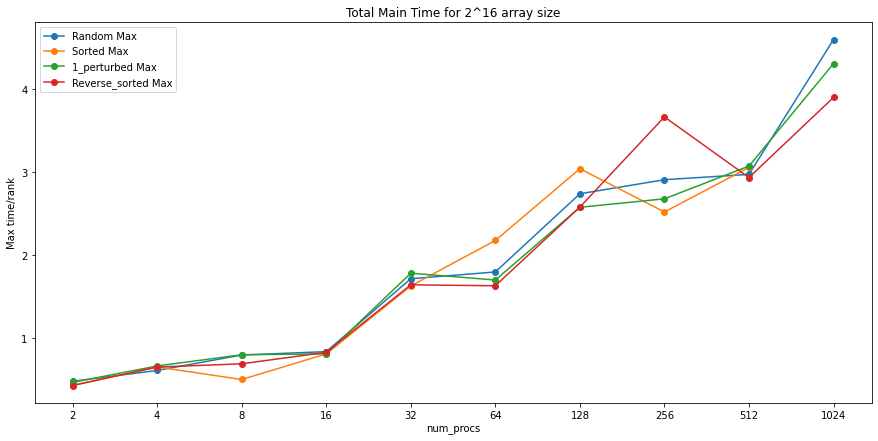

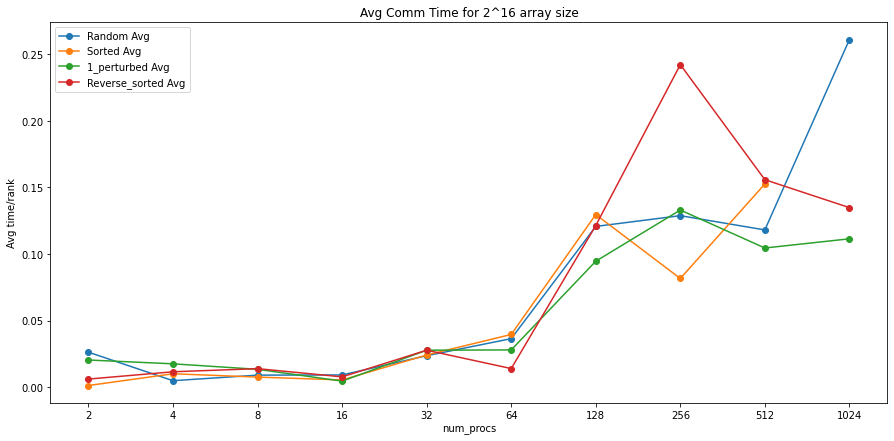

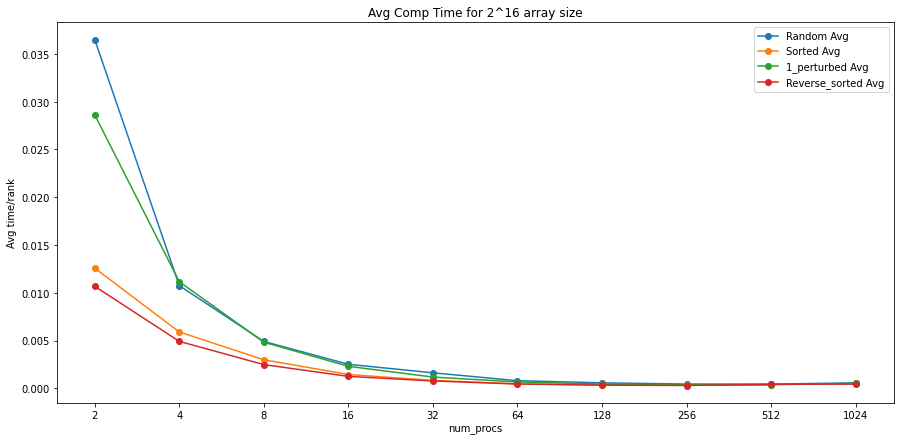

In [12]:
# call for all dataframes for each input size
plot(tks['tk16'], 16)

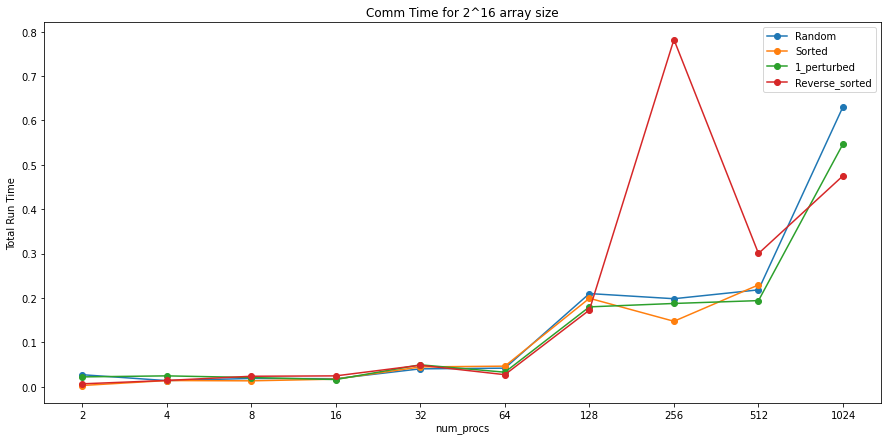

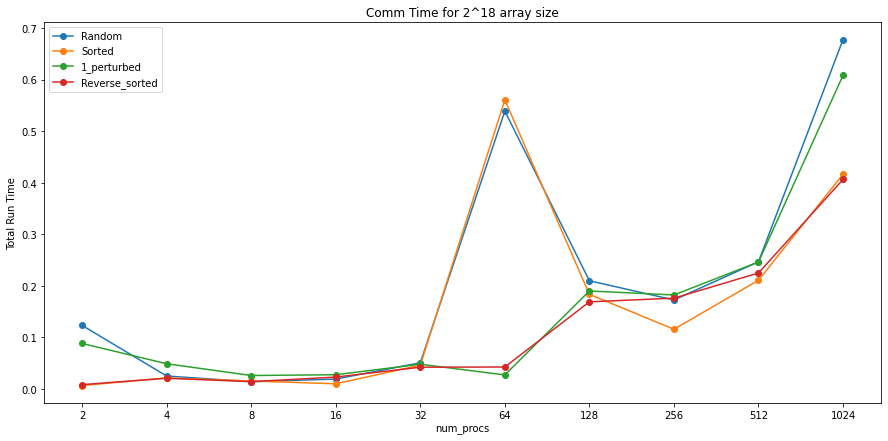

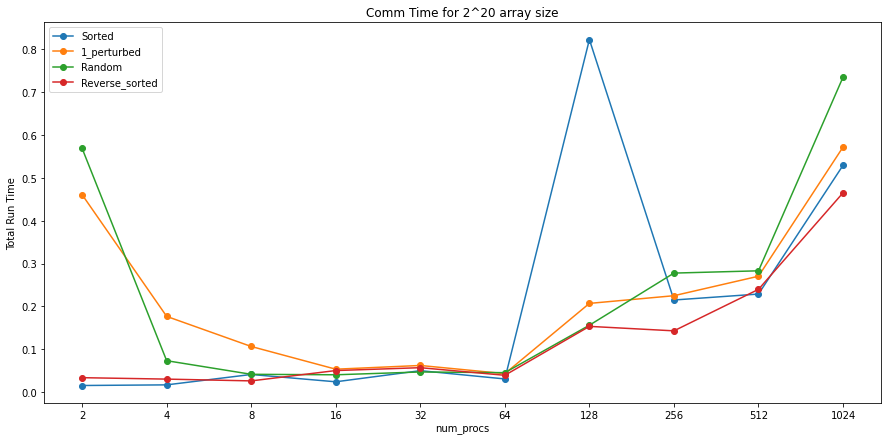

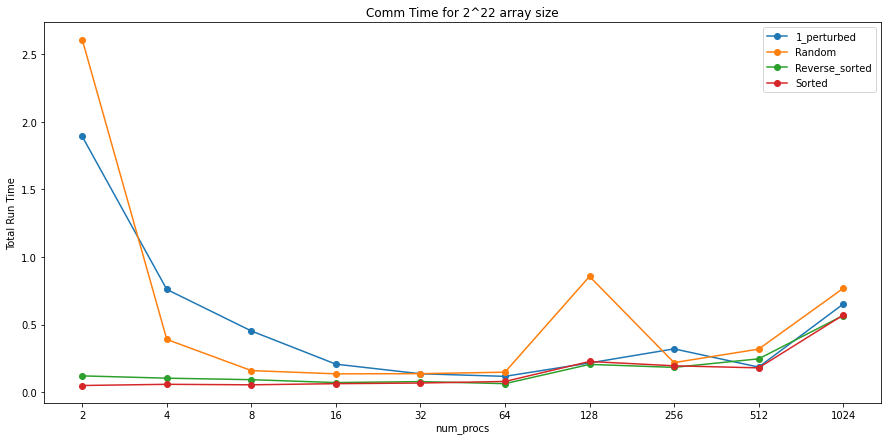

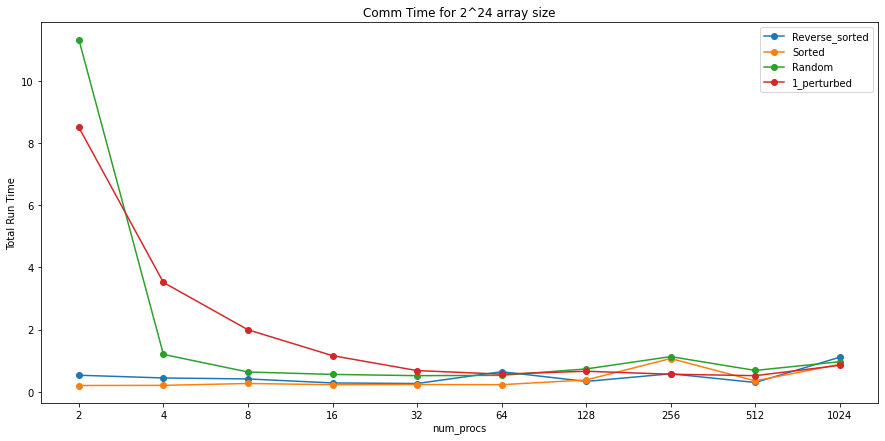

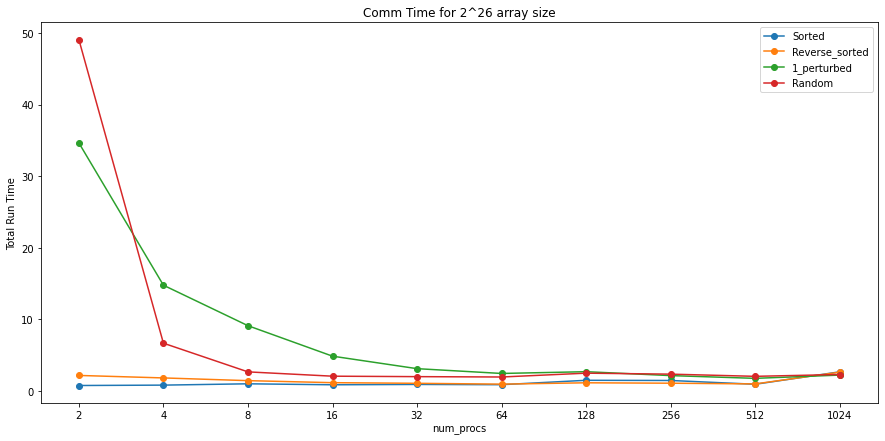

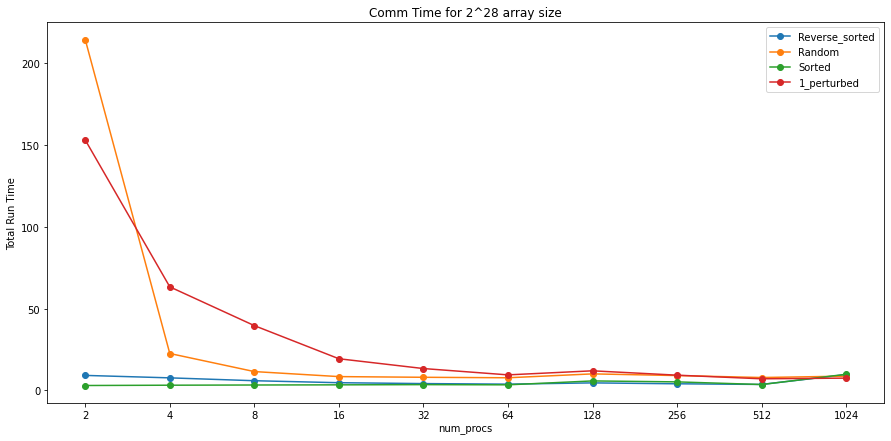

In [17]:
# all strong scaling main graphs
input_types = ['Random', 'Sorted', '1_perturbed', 'Reverse_sorted']
tk_names = ['tk16', 'tk18', 'tk20', 'tk22', 'tk24', 'tk26', 'tk28']
size_labels = ['2^16', '2^18', '2^20', '2^22', '2^24', '2^26', '2^28']

for i in range(7):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("comm"), ["Avg time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs']
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    
    labels = main_time['input_type'].unique()
    for label in labels:
        subset = main_time[main_time['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        ax.plot(subset['num_procs'], subset["Avg time/rank"], marker='o', label=label)

        
    ax.set_title(f'Comm Time for {size_labels[i]} array size')
    ax.set_xlabel('num_procs')
    ax.set_ylabel("Total Run Time")
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()


{'Random': [0.026925, 0.024841, 0.041144, 0.135335, 0.516637, 1.951116, 10.134393], 'Sorted': [0.002596, 0.021236, 0.040733, 0.06266, 0.231821, 0.877122, 5.827198], '1_perturbed': [0.021991, 0.048625, 0.106152, 0.206845, 0.680358, 2.445562, 12.007395], 'Reverse_sorted': [0.006388, 0.020445, 0.025747, 0.070686, 0.264694, 0.953891, 4.623936]}


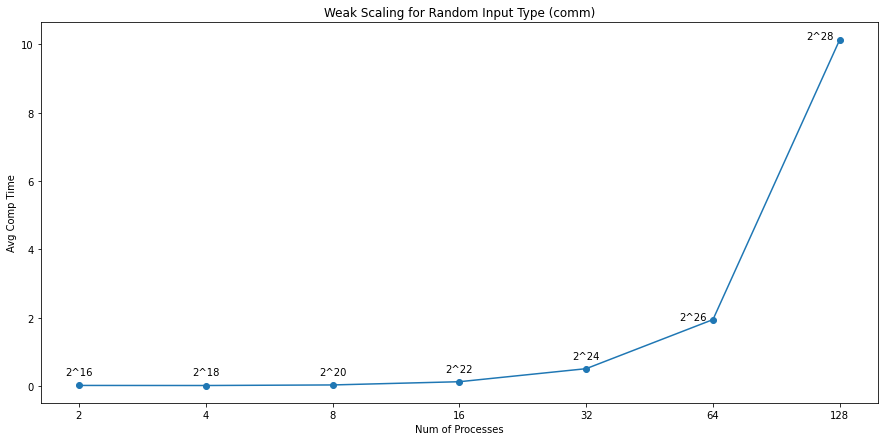

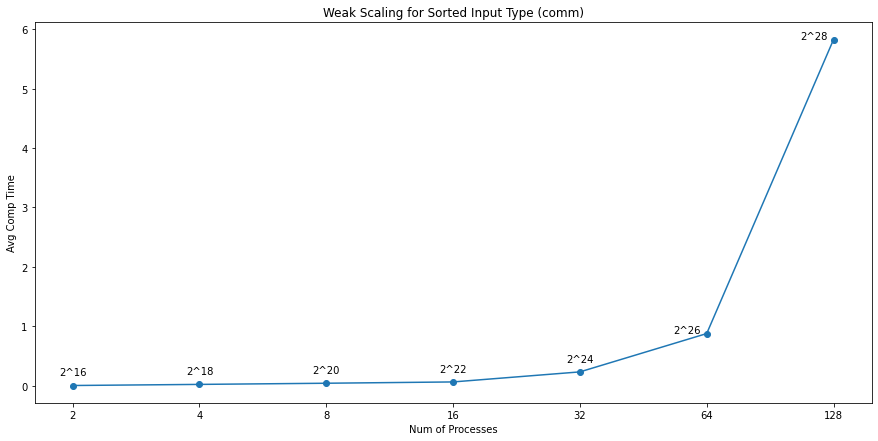

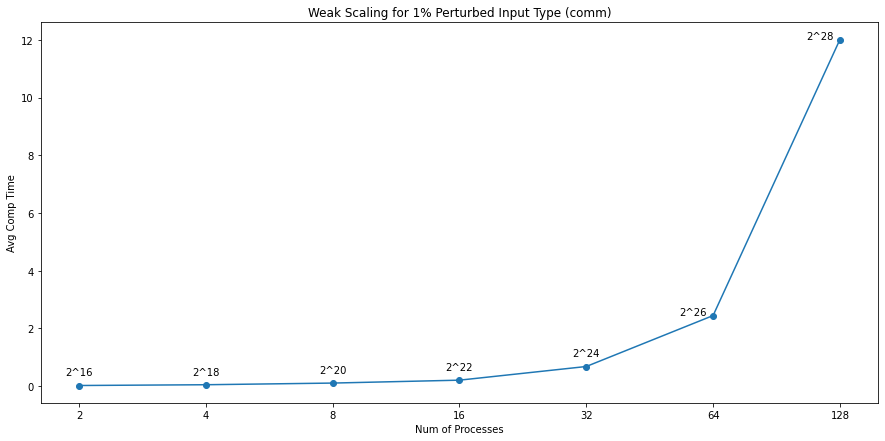

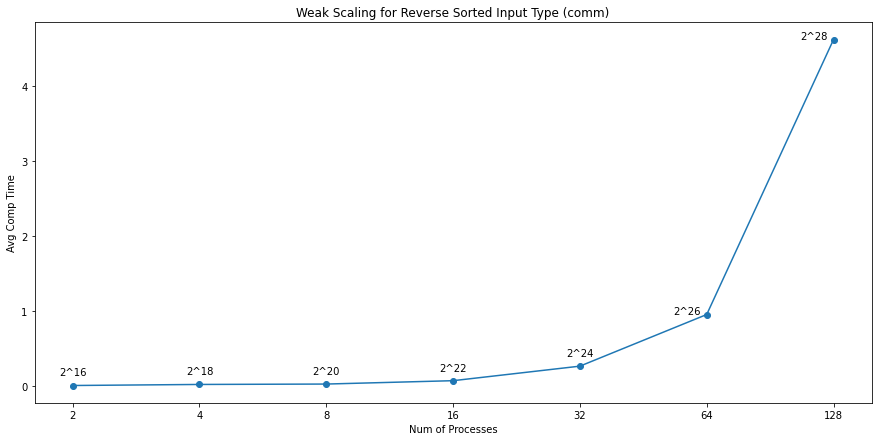

In [19]:
# weak scaling 

input_types = ['Random', 'Sorted', '1_perturbed', 'Reverse_sorted']
plt_names = ['Random', 'Sorted', '1% Perturbed', 'Reverse Sorted']
times = {label : [] for label in input_types}
tk_names = ['tk16', 'tk18', 'tk20', 'tk22', 'tk24', 'tk26', 'tk28']
size_labels = ['2^16', '2^18', '2^20', '2^22', '2^24', '2^26', '2^28']

for i in range(7):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("comm"), ["Avg time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs']
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    main_time.head()

    labels = main_time['input_type'].unique()
    for label in labels:
        subset = main_time[main_time['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        times[label].append(subset.loc[subset['num_procs'] == processes[i], 'Avg time/rank'].values[0])
        
        
print(times)
curr = 0
for label in input_types:
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(processes[0:7], times[label], marker='o')
    for i, txt in enumerate(size_labels):
        if i < 5:
            x = 0
            y = 10
        else:
            x = -20
            y = 0
        ax.annotate(txt, (processes[i], times[label][i]), textcoords="offset points", 
                    xytext=(x,y), ha='center')
    ax.set_title(f'Weak Scaling for {plt_names[curr]} Input Type (comm)')
    ax.set_xlabel('Num of Processes')
    ax.set_ylabel('Avg Comp Time')
    plt.xscale("log", base=2)
    plt.xticks(processes[0:7])
    ax.set_xticklabels(processes[0:7])
    plt.show()
    curr += 1


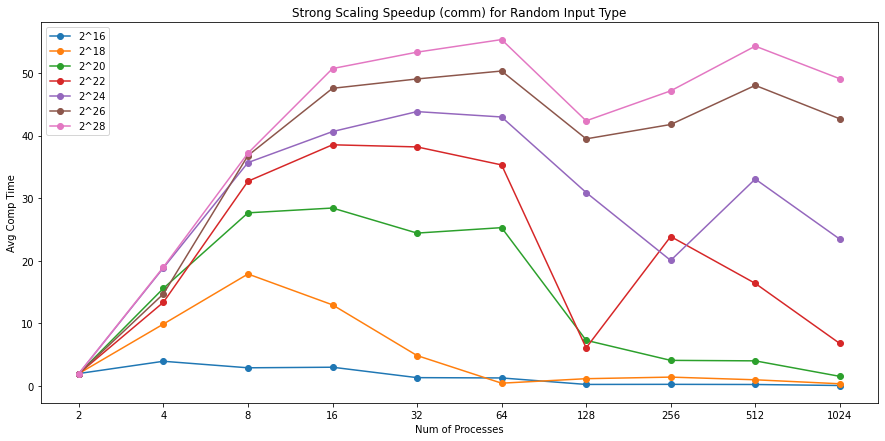

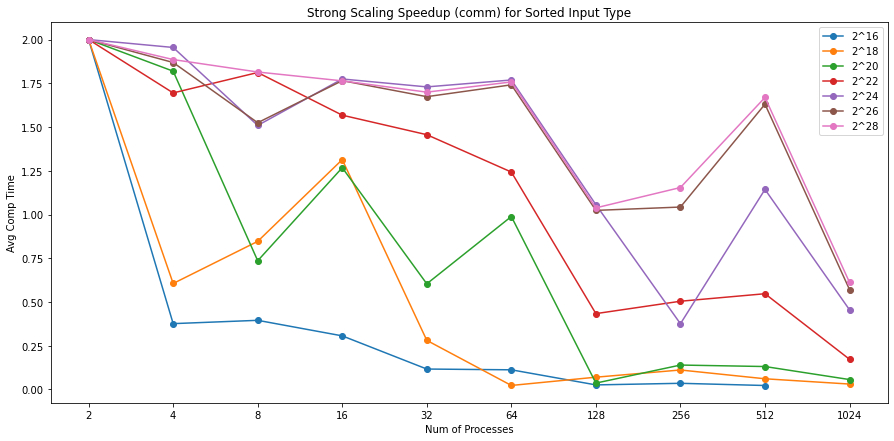

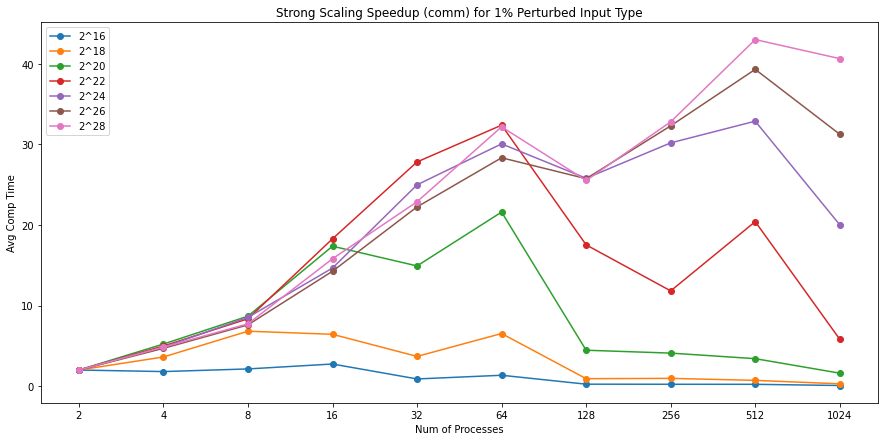

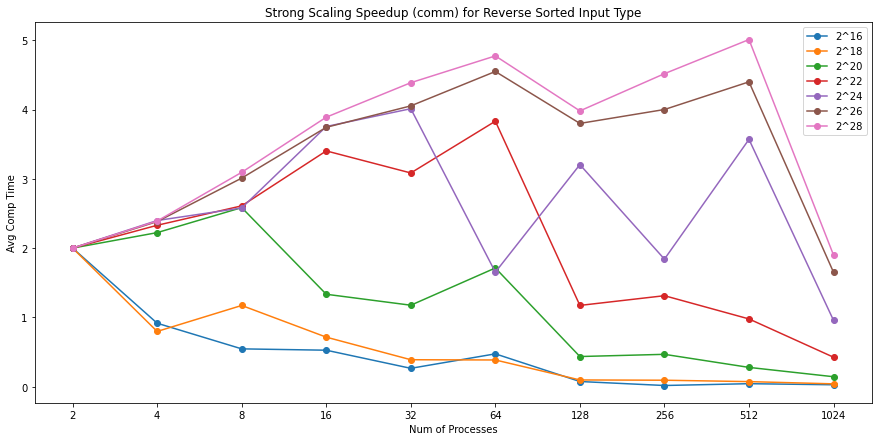

In [18]:
input_types = ['Random', 'Sorted', '1_perturbed', 'Reverse_sorted']
plt_names = ['Random', 'Sorted', '1% Perturbed', 'Reverse Sorted']
tk_names = ['tk16', 'tk18', 'tk20', 'tk22', 'tk24', 'tk26', 'tk28']
size_labels = ['2^16', '2^18', '2^20', '2^22', '2^24', '2^26', '2^28']
times = {label : {sz : [] for sz in size_labels} for label in input_types}

for i in range(7):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("comm"), ["Avg time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs']
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    main_time.head()

    labels = main_time['input_type'].unique()
    for label in labels:
        subset = main_time[main_time['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        subset_times = (2 * subset['Avg time/rank'].values[0]) / subset['Avg time/rank'].values
        
        times[label][size_labels[i]] = subset_times.tolist() 

# print(times)
curr = 0
for label in input_types:
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    for sz in size_labels:
        if len(times[label][sz]) < len(processes):
            missing_entries = len(processes) - len(times[label][sz])
            times[label][sz].extend([None] * missing_entries)
        ax.plot(processes, times[label][sz], marker='o', label=sz)
    ax.set_title(f'Strong Scaling Speedup (comm) for {plt_names[curr]} Input Type')
    ax.set_xlabel('Num of Processes')
    ax.set_ylabel('Avg Comp Time')
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()
    curr += 1


In [20]:
tkcm = th.Thicket.from_caliperreader(glob("Cache/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 11/11 [00:00<00:00, 24.66it/s]


(12,)
(12,)


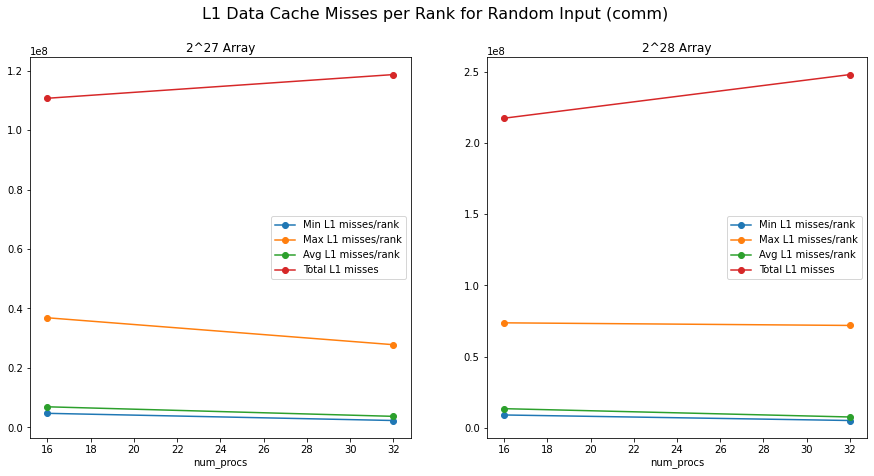

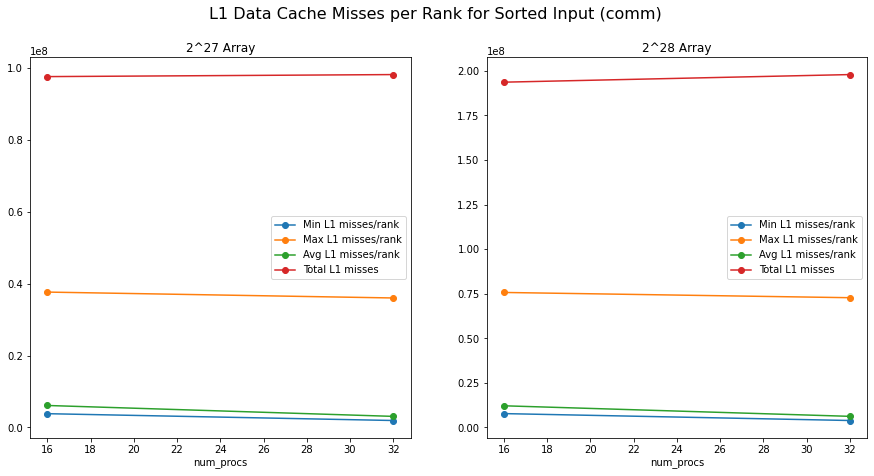

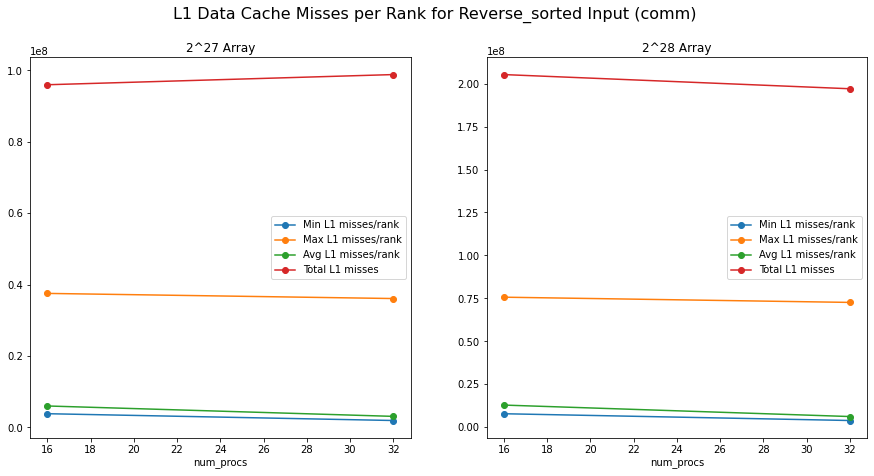

In [25]:
linesL1 = ["Min L1 misses/rank","Max L1 misses/rank", "Avg L1 misses/rank","Total L1 misses"]
linesL2 = ["Min L2 misses/rank","Max L2 misses/rank", "Avg L2 misses/rank","Total L2 misses"]
input_types = ['Random', 'Sorted', 'Reverse_sorted']


mpi_world_size = tkcm.metadata['mpi.world.size']
input_sizes = tkcm.metadata["input_size"]
array_types = tkcm.metadata["input_type"]

print(mpi_world_size.shape)
print(input_sizes.shape)
main_time = tkcm.dataframe.loc[tkcm.get_node("comm"), linesL1]
main_time = pd.merge(main_time, input_sizes, on="profile").merge(mpi_world_size, on="profile").merge(array_types, on ="profile")

for type in input_types:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    subset = main_time[main_time['input_size'] == 134217728]
    subset = subset[subset['input_type'] == type]
    for line in linesL1:
        ax1.plot(subset['mpi.world.size'], subset[line], marker='o', label=line)

    ax1.set_title(f'2^27 Array')
    ax1.set_xlabel('num_procs')
    ax1.legend()
    
    
    subset = main_time[main_time['input_size'] == 268435456]
    subset = subset[subset['input_type'] == type]

    for line in linesL1:
        ax2.plot(subset['mpi.world.size'], subset[line], marker='o', label=line)

    ax2.set_title(f'2^28 Array')
    ax2.set_xlabel('num_procs')
    ax2.legend()
    fig.suptitle(f'L1 Data Cache Misses per Rank for {type} Input (comm)', fontsize=16)

    plt.show()

(12,)
(12,)


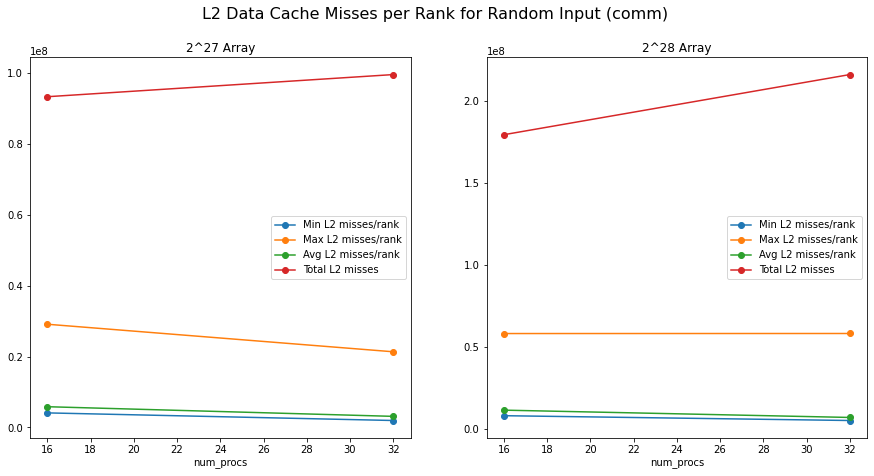

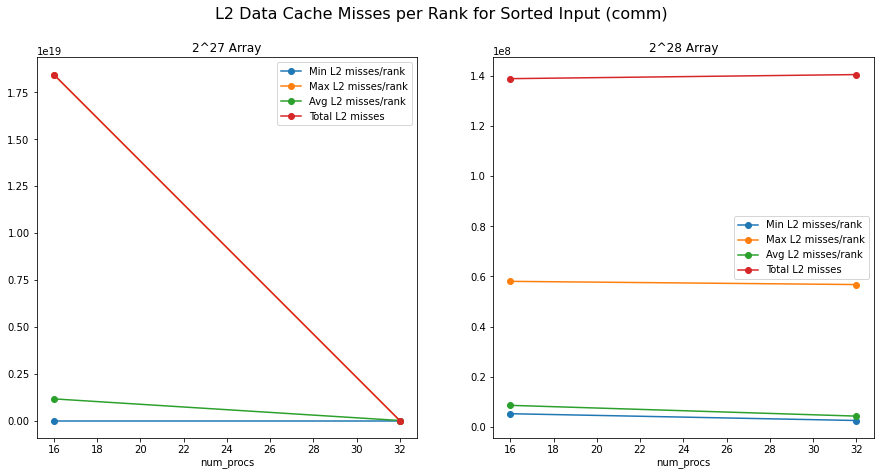

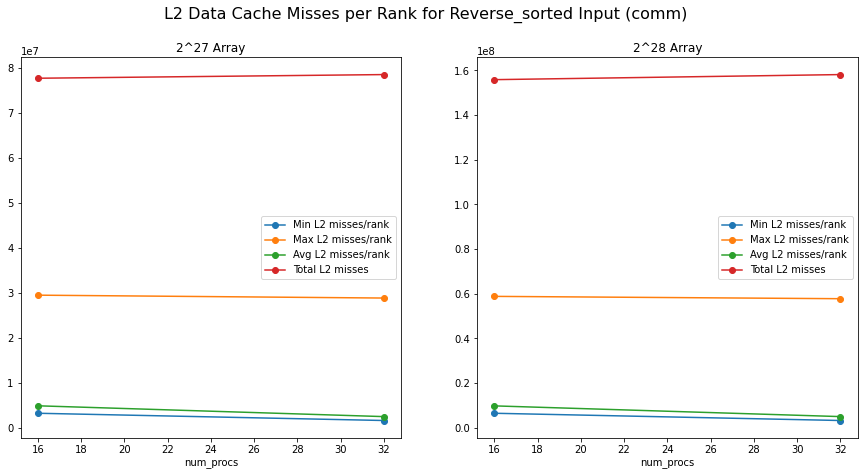

In [26]:
linesL1 = ["Min L1 misses/rank","Max L1 misses/rank", "Avg L1 misses/rank","Total L1 misses"]
linesL2 = ["Min L2 misses/rank","Max L2 misses/rank", "Avg L2 misses/rank","Total L2 misses"]
input_types = ['Random', 'Sorted', 'Reverse_sorted']


mpi_world_size = tkcm.metadata['mpi.world.size']
input_sizes = tkcm.metadata["input_size"]
array_types = tkcm.metadata["input_type"]

print(mpi_world_size.shape)
print(input_sizes.shape)
main_time = tkcm.dataframe.loc[tkcm.get_node("comm"), linesL2]
main_time = pd.merge(main_time, input_sizes, on="profile").merge(mpi_world_size, on="profile").merge(array_types, on ="profile")

for type in input_types:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    subset = main_time[main_time['input_size'] == 134217728]
    subset = subset[subset['input_type'] == type]
    for line in linesL2:
        ax1.plot(subset['mpi.world.size'], subset[line], marker='o', label=line)

    ax1.set_title(f'2^27 Array')
    ax1.set_xlabel('num_procs')
    ax1.legend()
    
    
    subset = main_time[main_time['input_size'] == 268435456]
    subset = subset[subset['input_type'] == type]

    for line in linesL2:
        ax2.plot(subset['mpi.world.size'], subset[line], marker='o', label=line)

    ax2.set_title(f'2^28 Array')
    ax2.set_xlabel('num_procs')
    ax2.legend()
    fig.suptitle(f'L2 Data Cache Misses per Rank for {type} Input (comm)', fontsize=16)

    plt.show()